### Dimensionality Reduction & Representation Learning 

In [106]:
### Import Pytorch and other relevant packages
import torch
import torch.nn as nn
### Import MNIST dataset 
from torchvision.datasets import MNIST
### Load Numpy and Matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [107]:
### Download MNIST data 
train_set = MNIST('.',download=True)
test_set = MNIST('.',train=False)

In [108]:
### Load the training and test data [x], along with labels [y]
xTrain, yTrain = torch.load('MNIST/processed/training.pt')
xTest, yTest = torch.load('MNIST/processed/test.pt')

In [109]:
### Get to know your data
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

torch.Size([60000, 28, 28]) torch.Size([60000])
torch.Size([10000, 28, 28]) torch.Size([10000])


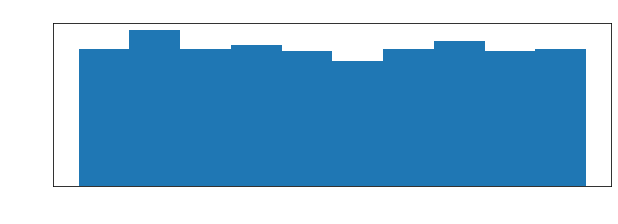

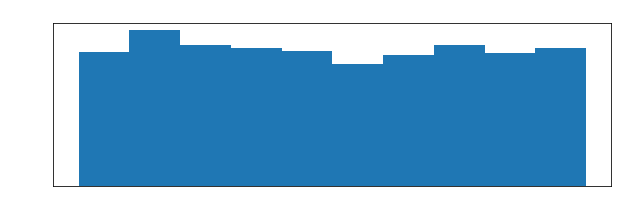

In [110]:
# Histogram
def histogram(x, title):
    fig = plt.figure(figsize=(10, 3))
    ax = fig.add_subplot(111)
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    plt.title(title, color='white')
    plt.xlabel('Classes', color='white')
    plt.ylabel('Number of ocurrences', color='white')
    plt.show(plt.hist(x))

histogram(yTrain, 'Class Histogram for Training Samples')
histogram(yTest, 'Class Histogram for Testing Samples')

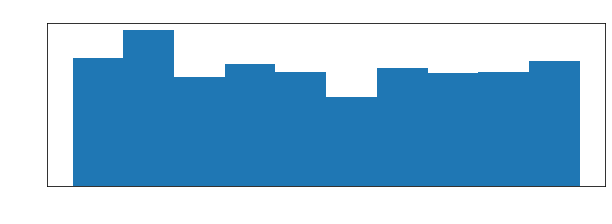

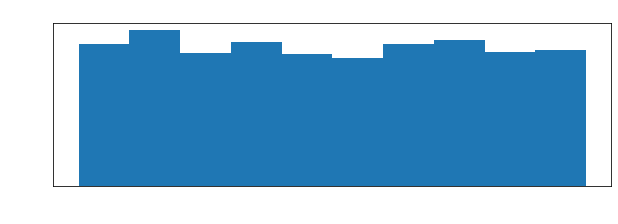

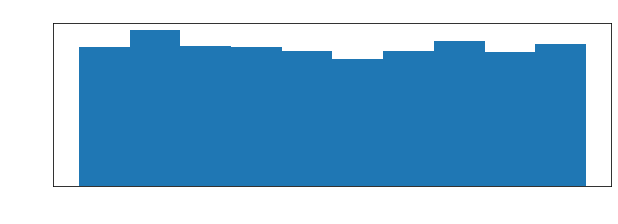

In [111]:
### Subset of data with [0,1,2,3,4,5] classes only
# Histogram for samples
from random import sample 
histogram(sample(list(yTrain), 1000), '1000 samples')
histogram(sample(list(yTrain), 10000), '10000 samples')
histogram(sample(list(yTrain), 25000), '25000 samples')

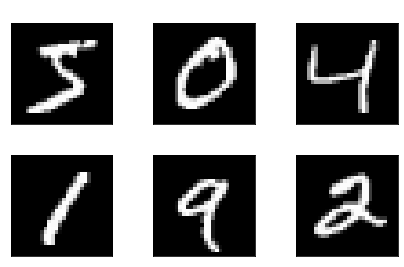

In [112]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(xTrain[i], cmap='gray', interpolation='none')
  plt.title("Label: {}".format(yTrain[i]), color='white')
  plt.xticks([])
  plt.yticks([])

In [113]:
### Reshape the images from Nx28x28 to Nx784
xTrain = xTrain.reshape(60000, 784)
xTest = xTest.reshape(10000, 784)

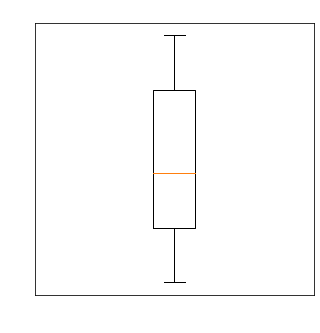

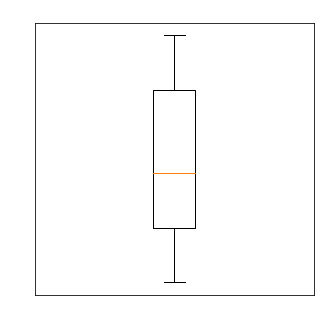

Average Train: 4.4539333333333335
Median Train: 4.0
Mode Train: [1]
-------------
Average Test: 4.4434
Median Test: 4.0
Mode Test: [1]


In [114]:
from scipy import stats
### Data Exploration
def boxplot(x, title):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    plt.title(title, color='white')
    plt.xlabel('Classes', color='white')
    plt.ylabel('Number of ocurrences', color='white')
    plt.show(plt.boxplot(x))
    
boxplot(yTrain, 'Classes for training')
boxplot(yTest, 'Classes for testing')
print('Average Train:', np.average(yTrain))
print('Median Train:', np.median(yTrain))
modeTrain = stats.mode(yTrain)
print('Mode Train:', modeTrain[0])
print('-------------')
print('Average Test:', np.average(yTest))
print('Median Test:', np.median(yTest))
modeTest = stats.mode(yTest)
print('Mode Test:', modeTest[0])

In [115]:
### Save copies of torch data in numpy as sklearn uses numpy arrays
xTrainNp, yTrainNp = xTrain.numpy(), yTrain.numpy()
xTestNp, yTestNp = xTest.numpy(), yTest.numpy()

### Principal Component Analysis
Use the sklearn package to perform the PCA tasks. 

In [116]:
### Smaller dataset
smallYTrain = yTrainNp
smallXTrain = xTrainNp
for i in range(5,10):
    smallYTrain = np.where(smallYTrain==i, 99, smallYTrain) 
smallXTrain = smallXTrain[smallYTrain != 99]
smallYTrain = smallYTrain[smallYTrain != 99]
print('Train:', smallXTrain.shape)
print('TrainLabels:', smallYTrain.shape)

smallYTest = yTestNp
smallXTest = xTestNp
for i in range(5,10):
    smallYTest = np.where(smallYTest==i, 99, smallYTest) 
smallXTest = smallXTest[smallYTest != 99]
smallYTest = smallYTest[smallYTest != 99]
print('Test:', smallXTest.shape)
print('TestLabels:', smallYTest.shape)

Train: (30596, 784)
TrainLabels: (30596,)
Test: (5139, 784)
TestLabels: (5139,)


In [117]:
from sklearn.decomposition import PCA
### PCA D=200
pca = PCA(n_components=200)
pca.fit(smallXTrain)
eigen_values = pca.singular_values_
explained_variance = pca.explained_variance_ratio_

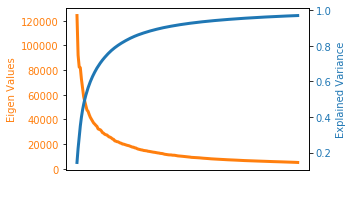

In [118]:
def plotPCA(eigen, variance):
    fig, ax1 = plt.subplots(figsize=(5, 3))

    color = 'tab:orange'
    ax1.set_xlabel('Vector', color='white')
    ax1.set_ylabel('Eigen Values', color=color)
    ax1.plot(eigen, color=color, linewidth=3, )
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Explained Variance', color=color)  # we already handled the x-label with ax1
    ax2.plot(np.cumsum(variance), color=color, linewidth=3)
    ax2.tick_params(axis='y', labelcolor=color)
    ax1.tick_params(axis='x', colors='white')

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
plotPCA(eigen_values, explained_variance)

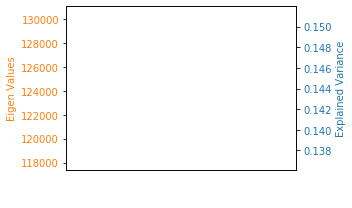

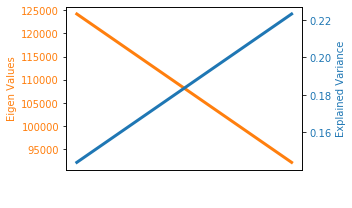

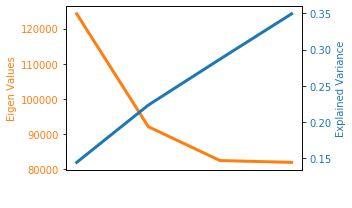

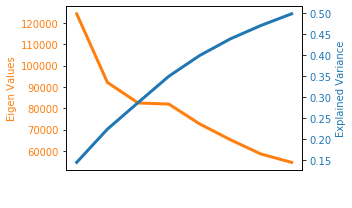

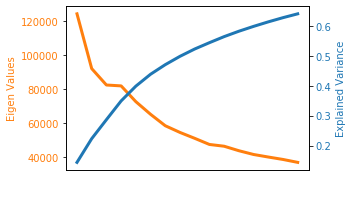

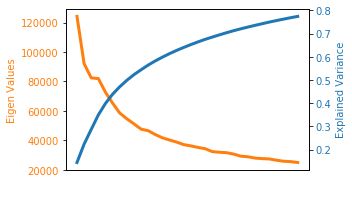

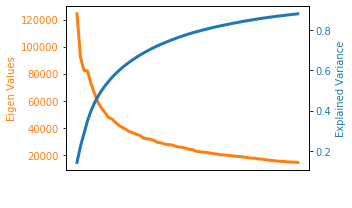

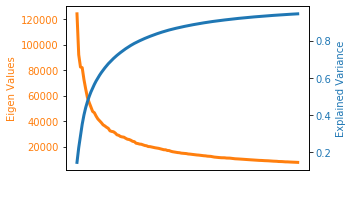

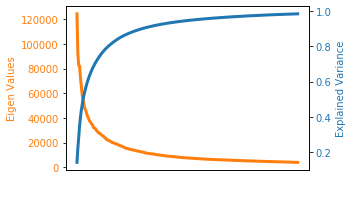

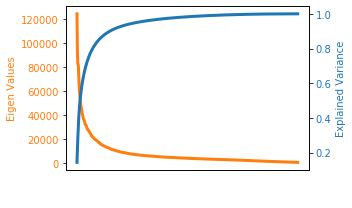

In [119]:
dValues = []
explainedVariance = []
for i in range(10):
    pca = PCA(n_components=2**i)
    pca.fit(smallXTrain)
    eigen_values = pca.singular_values_
    explained_variance = pca.explained_variance_ratio_
    dValues.append(2**i)
    explainedVariance.append(sum(explained_variance))
    plotPCA(eigen_values, explained_variance)

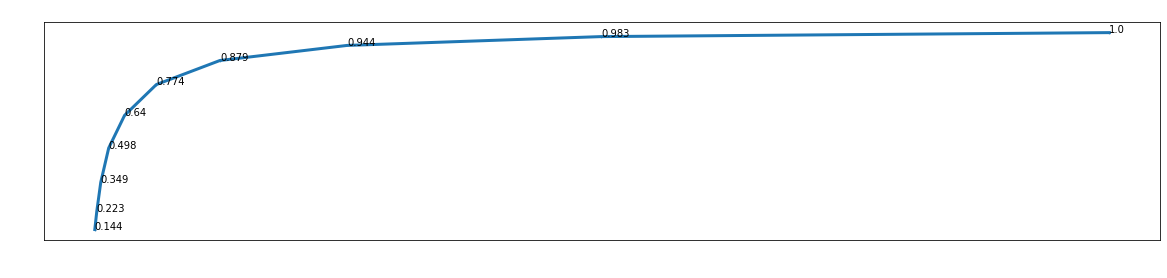

In [120]:
fig = plt.figure(figsize=(20, 4))
ax = fig.add_subplot(111)
ax.scatter(dValues, explainedVariance, s=0.5)
ax.plot(dValues, explainedVariance, linewidth=3)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.title('Explained Variance per D value', color='white')
plt.xlabel('D', color='white')
plt.ylabel('Explained Variance', color='white')
for a,b in zip(dValues, explainedVariance): 
    plt.text(a, b, str(round(b, 3)))
plt.show()

In [216]:
### Training Data
### PCA D=2
pca = PCA(n_components=2)
principalComponentsTrain = pca.fit_transform(smallXTrain)
x1 = principalComponentsTrain[:, [0]]
x1 = x1.reshape(x1.shape[0])
x2 = principalComponentsTrain[:, [1]]
x2 = x2.reshape(x2.shape[0])

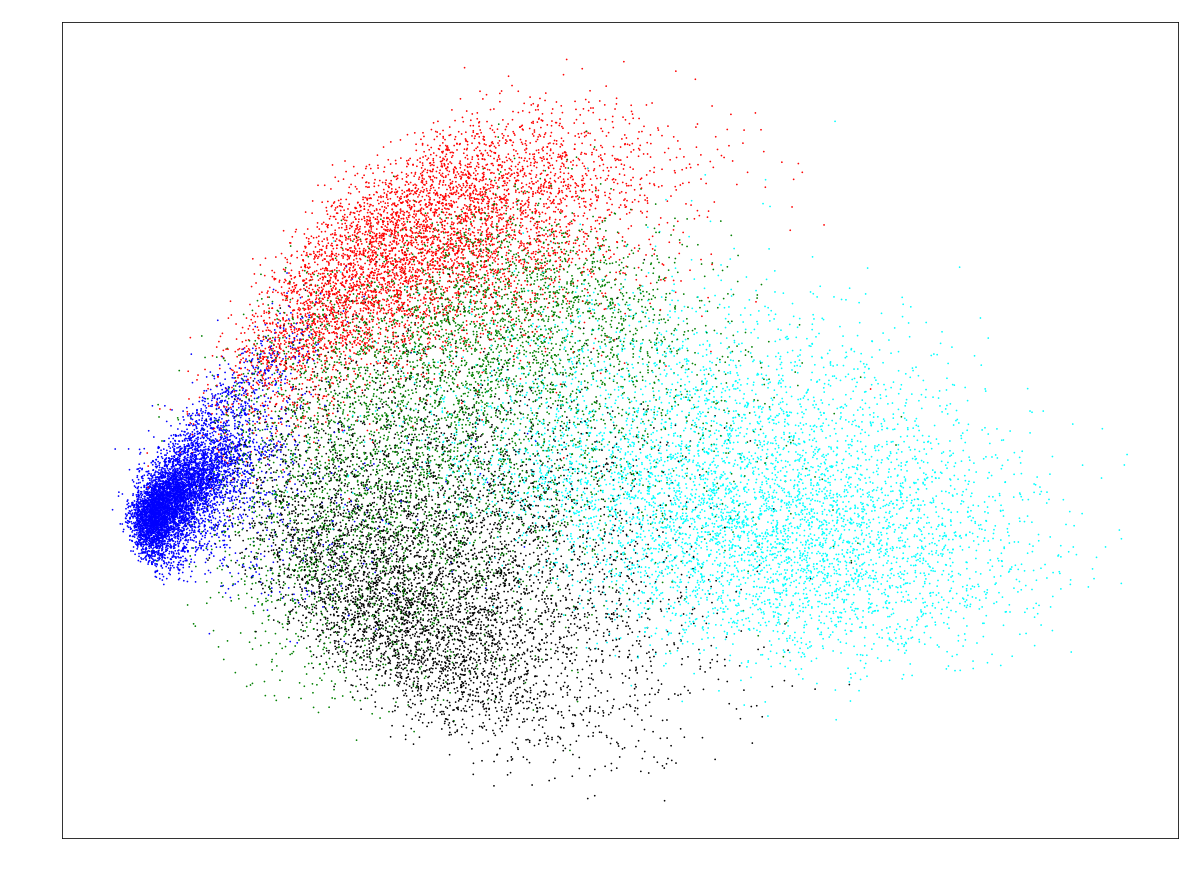

In [217]:
### Training Data
import matplotlib
### Sample plot to visualize the latent space
### If x1, x2 are the 1st and 2nd dimensions of 
### dimensionality reduced data, with labels y.
colors2 = ['cyan','blue','green','black', 'red']
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111)
plt.title("Training latent Space visualization for PCA", color='white')
plt.xlabel("Component 1", color='white')
plt.ylabel("Component 2", color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.scatter(x1,x2,c=smallYTrain,s=0.5, cmap=matplotlib.colors.ListedColormap(colors2))
plt.show()

In [219]:
### Training Data
### PCA D=2
pca = PCA(n_components=2)
principalComponentsTest = pca.fit_transform(smallXTest)
x1 = principalComponentsTest[:, [0]]
x1 = x1.reshape(x1.shape[0])
x2 = principalComponentsTest[:, [1]]
x2 = x2.reshape(x2.shape[0])

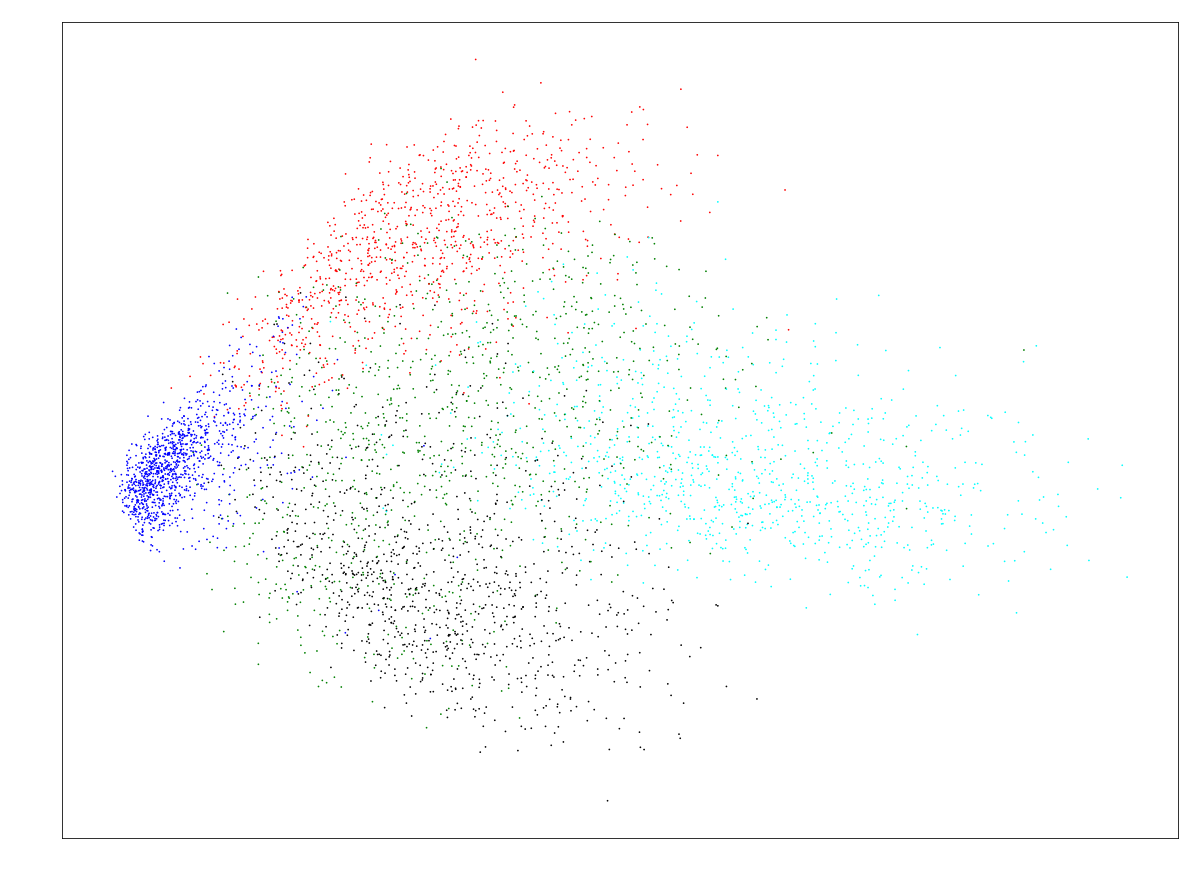

In [220]:
### Training Data
import matplotlib
### Sample plot to visualize the latent space
### If x1, x2 are the 1st and 2nd dimensions of 
### dimensionality reduced data, with labels y.
colors2 = ['cyan','blue','green','black', 'red']
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111)
plt.title("Testing latent Space visualization for PCA", color='white')
plt.xlabel("Component 1", color='white')
plt.ylabel("Component 2", color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.scatter(x1,x2,c=smallYTest,s=0.5, cmap=matplotlib.colors.ListedColormap(colors2))
plt.show()

Accuracy Train: 0.4835293697367687
[4 1 2 ... 3 2 0]


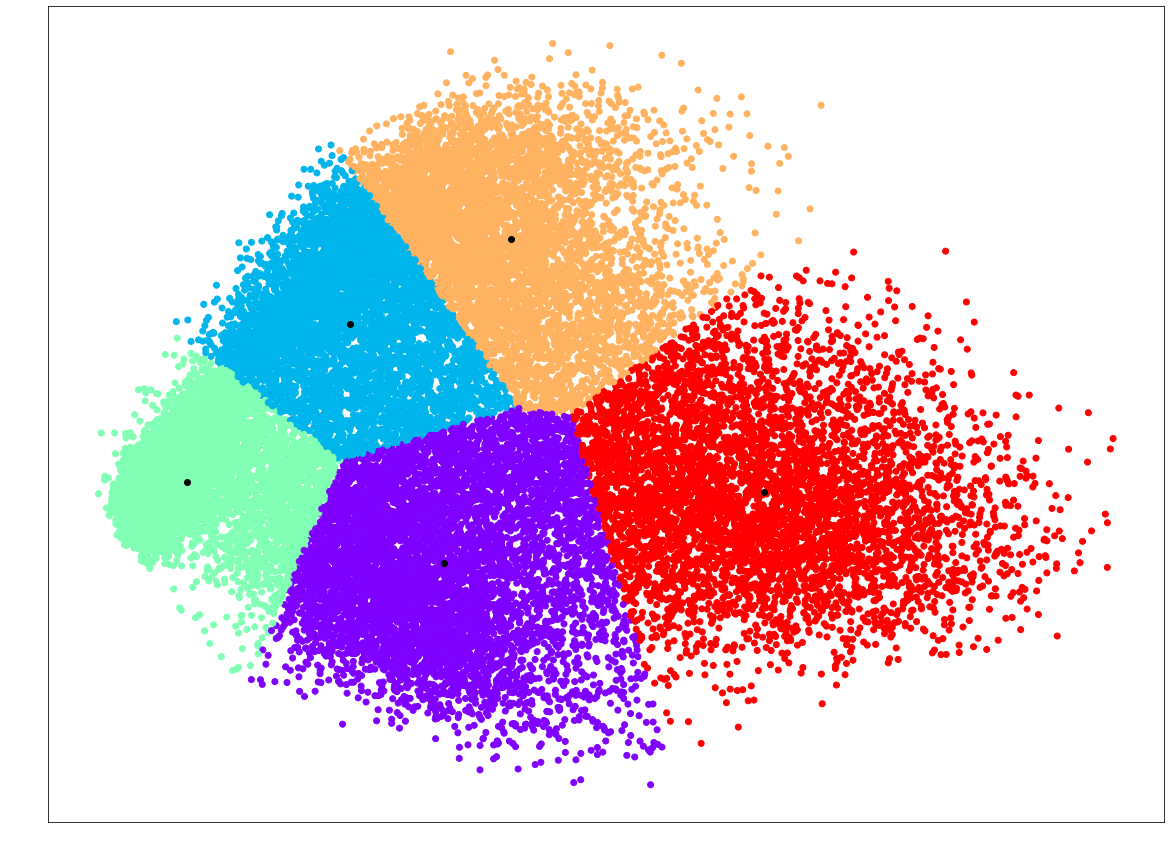

In [236]:
### Kmeans Train
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(principalComponentsTrain)
y_kmeans = kmeans.predict(principalComponentsTrain)
centroids = kmeans.cluster_centers_
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.scatter(principalComponentsTrain[:,0],principalComponentsTrain[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(centroids[:,0], centroids[:,1], color='black')
accuracy = adjusted_rand_score(smallYTrain, kmeans.labels_)
print('Accuracy Train:', accuracy)
print(kmeans.labels_)

Accuracy Test: 0.501523407099321


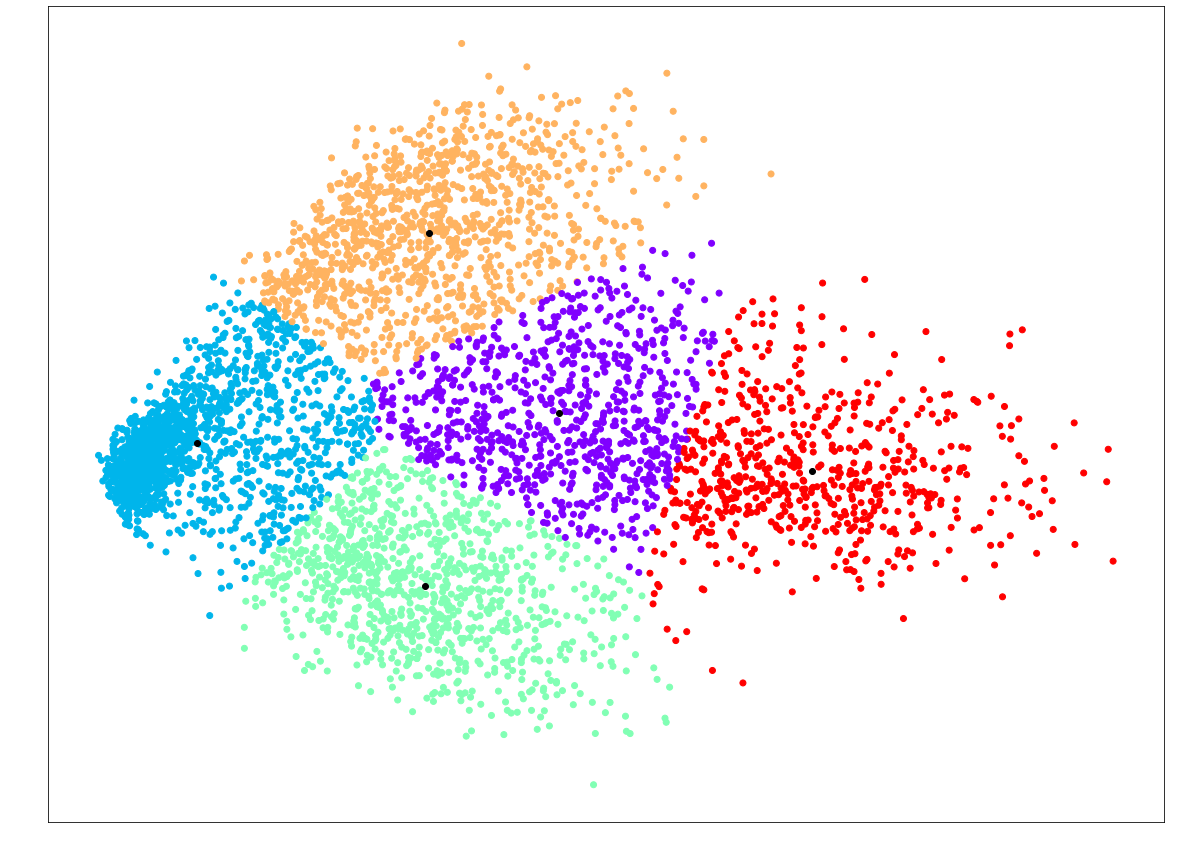

In [237]:
### Kmeans Test
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(principalComponentsTest)
y_kmeans = kmeans.predict(principalComponentsTest)
centroids = kmeans.cluster_centers_
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.scatter(principalComponentsTest[:,0],principalComponentsTest[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(centroids[:,0], centroids[:,1], color='black')
accuracy = adjusted_rand_score(smallYTest, kmeans.labels_)
print('Accuracy Test:', accuracy)

### Autoencoders
Below the Pytorch classes for an autoencoder and variational autoencoder, along with a training script 
are provided with some key components to be filled in by you. 

In [133]:
### Import additional torch modules
from torch.utils.data import DataLoader, random_split
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image

In [134]:
### Set parameters for the model
torch.manual_seed(42) # set fixed random seed for reproducibility

batch_size = 128
epochs = 10
latent_dim = 2
lr = 1e-4

cuda = True # Set this if training on GPU
cuda = cuda and torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
print("Using "+repr(device))

Using device(type='cpu')


In [135]:
from torch.utils import data

my_x = smallXTrain # a list of numpy arrays
my_y = smallYTrain # another list of numpy arrays (targets)

tensor_x = torch.Tensor(my_x) # transform to torch tensor
tensor_y = torch.Tensor(my_y)

training_set = data.TensorDataset(tensor_x,tensor_y) # create your datset


my_x = smallXTest # a list of numpy arrays
my_y = smallYTest # another list of numpy arrays (targets)

tensor_x = torch.Tensor(my_x) # transform to torch tensor
tensor_y = torch.Tensor(my_y)

testing_set = data.TensorDataset(tensor_x,tensor_y) # create your datset

In [136]:
### Torch uses a specialised dataloader for faster access
### It also has some nice properties to do efficient prefetching,
### batching and data augmentation
N = len(training_set)
nTrain = int(0.8*N)
nValid = N-nTrain

valid_set, train_set = random_split(training_set,(nValid,nTrain))
print("Using nTrain: %d, nValid: %d "%(nTrain, nValid))

train_loader = torch.utils.data.DataLoader(train_set,
    batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_set,
    batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(testing_set,
    batch_size=batch_size, shuffle=True)


Using nTrain: 24476, nValid: 6120 


In [156]:
### Autoencoder class
class AE(nn.Module):
    def __init__(self,latent_dim):
        super(AE, self).__init__()
        ### Encoder layers
        self.fc_enc1 = nn.Linear(784, 32)
        self.fc_enc2 = nn.Linear(32, 16)
        self.fc_enc3 = nn.Linear(16, latent_dim)
        
        ### Decoder layers
        self.fc_dec1 = nn.Linear(latent_dim, 16)
        self.fc_dec2 = nn.Linear(16,32)
        self.fc_dec3 = nn.Linear(32,784)

    def encode(self, x):
        
        ### Fill in the encoder
        ### by calling the corresponding layers
        ### initialized above. 
        ### You can use F.relu() to call the
        ### rectified linear unit activation function
        
        z = self.fc_enc1(x)
        z = F.relu(z)
        z = self.fc_enc2(z)
        z = F.relu(z)
        z = self.fc_enc3(z)
        #z = F.relu(z)
        
        return z
    
    def decode(self, z):
        
        ### Fill in the decoder
        ### by calling the corresponding layers
        ### initialized above. 
        ### You can use torch.sigmoid() to call the
        ### sigmoid activation function
        
        z = self.fc_dec1(z)
        z = F.relu(z)
        z = self.fc_dec2(z)
        z = F.relu(z)
        z = self.fc_dec3(z)
        xHat = torch.sigmoid(z)

        return xHat

    def forward(self, x):
        ### Autoencoder returns the reconstruction 
        ### and latent representation
        z = self.encode(x)
        # decode z
        xHat = self.decode(z)
        return xHat,z 

In [157]:
# Reconstruction + KL divergence losses summed over all elements and batch
def elbo_loss(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')

    # see Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    KLD = ##### Complete the KL computation here

    return BCE + KLD


class VAE(nn.Module):
    def __init__(self,latent_dim):
        super(VAE, self).__init__()
        
        
        ### Encoder layers
        self.fc_enc1 = nn.Linear(784, 32)
        self.fc_enc2 = nn.Linear(32, 16)
        self.fc_enc3 = nn.Linear(16, 2*latent_dim) # Note we return 2*latent_dim
        
        ### Decoder layers
        self.fc_dec1 = nn.Linear(latent_dim, 16)
        self.fc_dec2 = nn.Linear(16,32)
        self.fc_dec3 = nn.Linear(32,784)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        z = ####### Complete the reparameterisation step here
        return z

    def encode(self, x):
        ### Fill in the encoder
        ### by calling the corresponding layers
        ### initialized above.
        
        
        mu, logvar = torch.chunk(x,2)
        return mu, logvar

    
    def decode(self, z):
        
        ### Fill in the decoder
        ### by calling the corresponding layers
        ### initialized above. 
        ### You can use torch.sigmoid() to call the
        ### sigmoid activation function
        
        return xHat
    
    def forward(self, x):
        
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        xHat = self.decode(z)
        
        return xHat, mu, logvar

SyntaxError: invalid syntax (<ipython-input-157-9b5fb54d9e18>, line 9)

In [193]:
#### Sample training script for autoencoder

model = AE(2).to(device)
optimizer = optim.Adam(model.parameters(), lr=lr)
loss_function = nn.BCELoss()

for epoch in range(1, epochs + 1):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        xHat, z = model(data)
        loss = loss_function(xHat, data)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        if batch_idx % 5 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))

    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))


Train Epoch: 1 [0/24476 (0%)]	Loss: -0.011541
Train Epoch: 1 [640/24476 (3%)]	Loss: -0.024463
Train Epoch: 1 [1280/24476 (5%)]	Loss: -0.052718
Train Epoch: 1 [1920/24476 (8%)]	Loss: -0.069750
Train Epoch: 1 [2560/24476 (10%)]	Loss: -0.142465
Train Epoch: 1 [3200/24476 (13%)]	Loss: -0.198704
Train Epoch: 1 [3840/24476 (16%)]	Loss: -0.304099
Train Epoch: 1 [4480/24476 (18%)]	Loss: -0.386095
Train Epoch: 1 [5120/24476 (21%)]	Loss: -0.545766
Train Epoch: 1 [5760/24476 (23%)]	Loss: -0.672137
Train Epoch: 1 [6400/24476 (26%)]	Loss: -0.728770
Train Epoch: 1 [7040/24476 (29%)]	Loss: -0.920932
Train Epoch: 1 [7680/24476 (31%)]	Loss: -0.992967
Train Epoch: 1 [8320/24476 (34%)]	Loss: -1.266759
Train Epoch: 1 [8960/24476 (36%)]	Loss: -1.443487
Train Epoch: 1 [9600/24476 (39%)]	Loss: -1.477222
Train Epoch: 1 [10240/24476 (42%)]	Loss: -1.624909
Train Epoch: 1 [10880/24476 (44%)]	Loss: -1.874523
Train Epoch: 1 [11520/24476 (47%)]	Loss: -2.087455
Train Epoch: 1 [12160/24476 (49%)]	Loss: -2.071935
Trai

Train Epoch: 5 [3200/24476 (13%)]	Loss: -6.611566
Train Epoch: 5 [3840/24476 (16%)]	Loss: -6.064961
Train Epoch: 5 [4480/24476 (18%)]	Loss: -6.293100
Train Epoch: 5 [5120/24476 (21%)]	Loss: -6.475560
Train Epoch: 5 [5760/24476 (23%)]	Loss: -6.569151
Train Epoch: 5 [6400/24476 (26%)]	Loss: -5.981654
Train Epoch: 5 [7040/24476 (29%)]	Loss: -6.327463
Train Epoch: 5 [7680/24476 (31%)]	Loss: -6.456682
Train Epoch: 5 [8320/24476 (34%)]	Loss: -6.471179
Train Epoch: 5 [8960/24476 (36%)]	Loss: -6.354306
Train Epoch: 5 [9600/24476 (39%)]	Loss: -6.190241
Train Epoch: 5 [10240/24476 (42%)]	Loss: -5.993969
Train Epoch: 5 [10880/24476 (44%)]	Loss: -6.410507
Train Epoch: 5 [11520/24476 (47%)]	Loss: -6.432233
Train Epoch: 5 [12160/24476 (49%)]	Loss: -6.065149
Train Epoch: 5 [12800/24476 (52%)]	Loss: -6.576577
Train Epoch: 5 [13440/24476 (55%)]	Loss: -6.515794
Train Epoch: 5 [14080/24476 (57%)]	Loss: -6.777237
Train Epoch: 5 [14720/24476 (60%)]	Loss: -6.385040
Train Epoch: 5 [15360/24476 (62%)]	Loss: -

Train Epoch: 9 [6400/24476 (26%)]	Loss: -6.296504
Train Epoch: 9 [7040/24476 (29%)]	Loss: -6.503107
Train Epoch: 9 [7680/24476 (31%)]	Loss: -6.425642
Train Epoch: 9 [8320/24476 (34%)]	Loss: -6.828588
Train Epoch: 9 [8960/24476 (36%)]	Loss: -6.659408
Train Epoch: 9 [9600/24476 (39%)]	Loss: -6.490940
Train Epoch: 9 [10240/24476 (42%)]	Loss: -6.326355
Train Epoch: 9 [10880/24476 (44%)]	Loss: -6.380677
Train Epoch: 9 [11520/24476 (47%)]	Loss: -6.385974
Train Epoch: 9 [12160/24476 (49%)]	Loss: -6.305840
Train Epoch: 9 [12800/24476 (52%)]	Loss: -6.378097
Train Epoch: 9 [13440/24476 (55%)]	Loss: -6.115736
Train Epoch: 9 [14080/24476 (57%)]	Loss: -6.531746
Train Epoch: 9 [14720/24476 (60%)]	Loss: -6.496270
Train Epoch: 9 [15360/24476 (62%)]	Loss: -6.657131
Train Epoch: 9 [16000/24476 (65%)]	Loss: -6.422878
Train Epoch: 9 [16640/24476 (68%)]	Loss: -6.187355
Train Epoch: 9 [17280/24476 (70%)]	Loss: -6.493638
Train Epoch: 9 [17920/24476 (73%)]	Loss: -6.625661
Train Epoch: 9 [18560/24476 (76%)]	Lo

In [245]:
results = []
yList = []
#training_set
n = 0
for batch, y in train_loader.dataset:
        n += 1
        yList.append(y.item())
        img = batch
        img = torch.Tensor(img)
        img = img.to(device)
        z = model.encode(img)
        results.append(z)
print(n)
print(len(yList))

24476
24476


In [246]:
resultsTrain = np.asarray(results)
yList = np.asarray(yList)

In [247]:
x1 = []
x2 = []
for i in range(len(resultsTrain)):
    x = resultsTrain[i][0].item()
    y = resultsTrain[i][1].item()
    x1.append(x)
    x2.append(y)

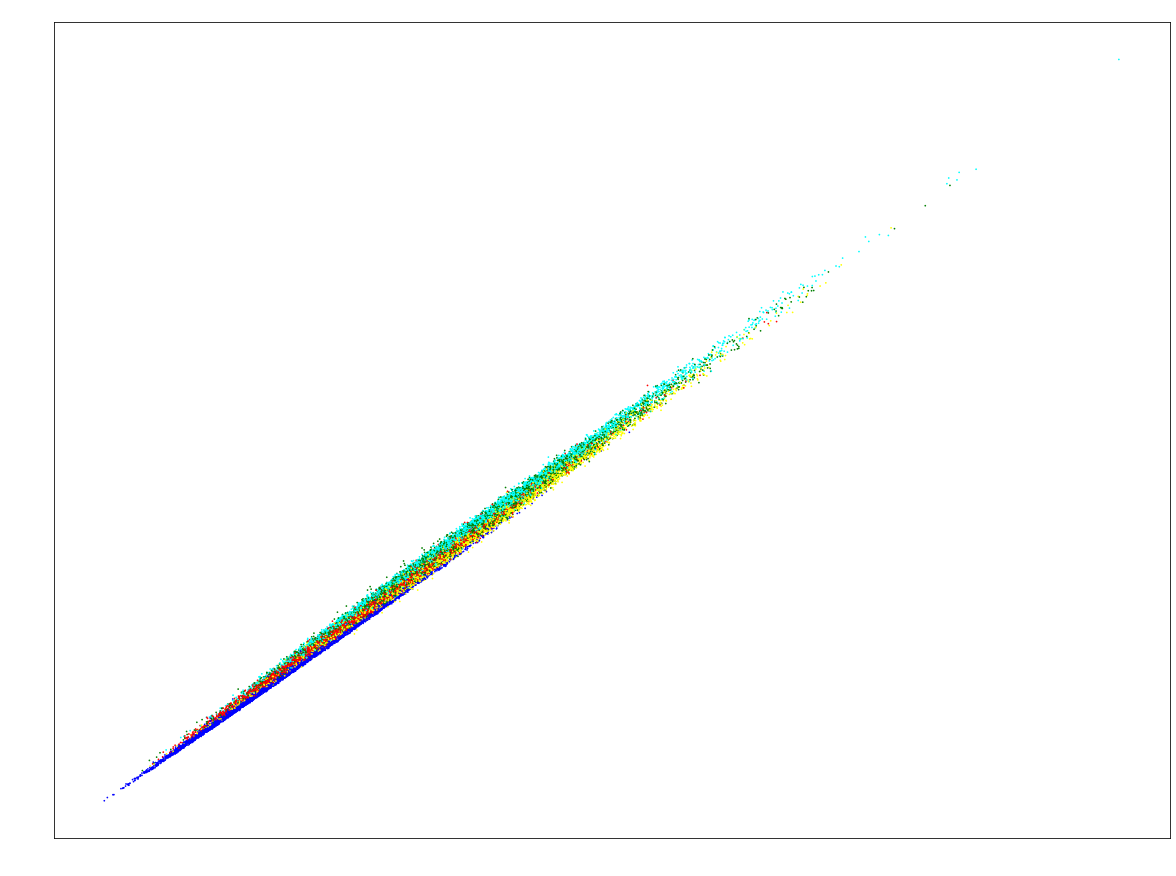

In [248]:
colors2 = ['cyan','blue','green','yellow', 'red']
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111)
plt.title("Training latent Space visualization for AutoEncoder", color='white')
plt.xlabel("Component 1", color='white')
plt.ylabel("Component 2", color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.scatter(x1,x2,c=yList,s=0.5, cmap=matplotlib.colors.ListedColormap(colors2))
plt.show()

In [249]:
from numpy import column_stack
x1 = np.asarray(x1)
x1.reshape(x1.shape[0])
x2 = np.asarray(x2)
x2.reshape(x2.shape[0])
components = column_stack((x1,x2))

In [250]:
components = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

Accuracy Train: 0.10778914321836286


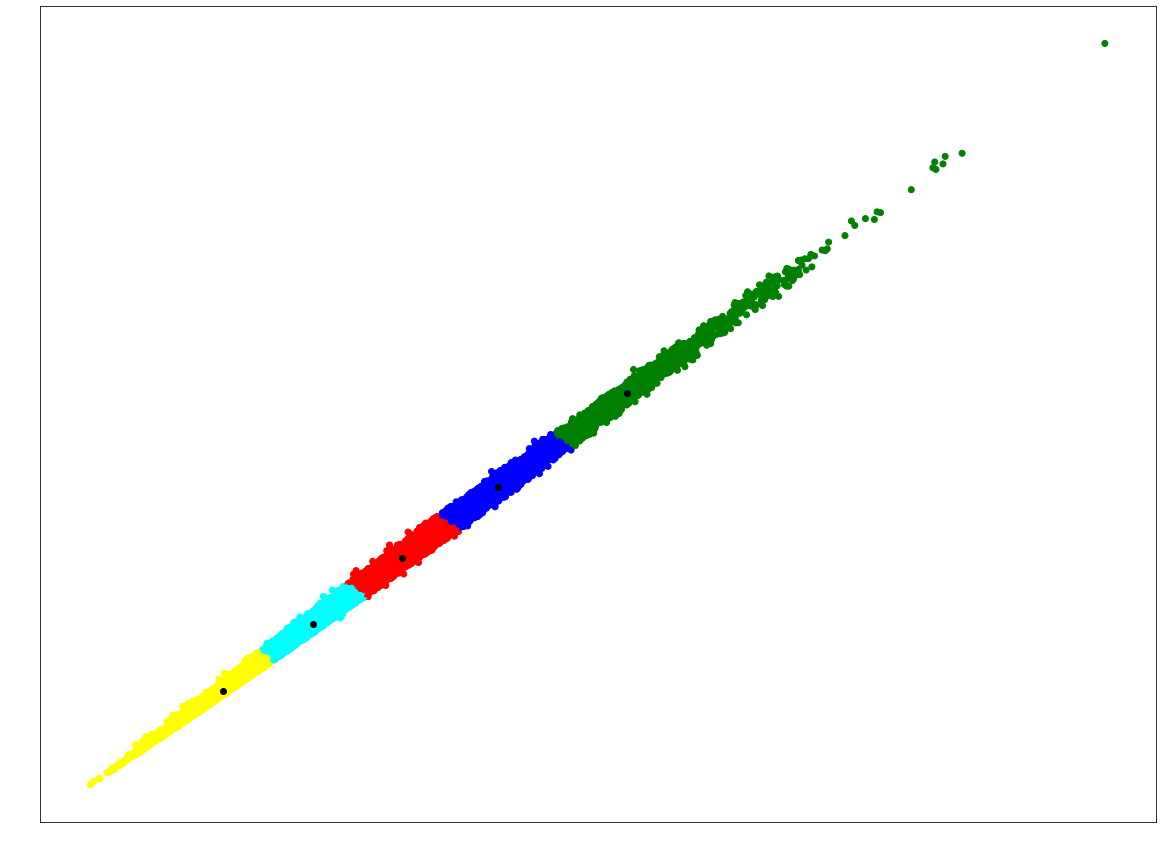

In [252]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(components)
predictions = kmeans.predict(components)
centroids = kmeans.cluster_centers_
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.scatter(components[:,0],components[:,1], c=kmeans.labels_, cmap=matplotlib.colors.ListedColormap(colors2))
plt.scatter(centroids[:,0], centroids[:,1], color='black')
#accuracy = accuracy_score(predictions, y, normalize=True, sample_weight=None)
accuracy = adjusted_rand_score(yList, kmeans.labels_)
print('Accuracy Train:', accuracy)

In [189]:
### Use converged model to evaluate on test set.
#dataiter_test = iter(test_loader.dataset)
#dataiter_test = dataiter_test.next()
#outputs_train = model(dataiter_test) 
#

#test_loss /= len(test_loader.dataset)
#print('====> Test set loss: {:.4f}'.format(test_loss))


### Sample from latent space and visualize 
### some examples
model.eval()
test_loss = 0
correct = 0
for (data, target) in test_loader:
    
    data, target = data.cuda(), data.cuda()
    target = Variable(target, volatile=True)
    data = Variable(data)
    output = model(data)
    test_loss += F.cross_entropy(output, data).data[0]# F.nll_loss(output, target).data[0] #F.nll_loss(output, target, size_average=False).data[0] # sum up batch loss
    pred = output.data.max(1)[1] # get the index of the max log-probability
    correct += pred.eq(target.data).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

AssertionError: 
The NVIDIA driver on your system is too old (found version 9010).
Please update your GPU driver by downloading and installing a new
version from the URL: http://www.nvidia.com/Download/index.aspx
Alternatively, go to: https://pytorch.org to install
a PyTorch version that has been compiled with your version
of the CUDA driver.

In [ ]:
##### Sample training script for autoencoder
### This has to be modified slightly to work with VAEs!!!

model = AE().to(device)
optimizer = optim.Adam(model.parameters(), lr=lr)
loss_function = nn.BCELoss()

for epoch in range(1, epochs + 1):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        xHat, z = model(data)
        loss = loss_function(xHat, data)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        if batch_idx % 5 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))

    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))
    
    model.eval()
    valid_loss = 0
    with torch.no_grad():
        for i, (data, _) in enumerate(valid_loader):
            data = data.to(device)
            recon_batch, mu, logvar = model(data)
            valid_loss += loss_function(xHat, data).item()
            if i == 0:
                n = min(data.size(0), 8)
                comparison = torch.cat([data[:n],
                                      recon_batch.view(batch_size, 1, 28, 28)[:n]])
                save_image(comparison.cpu(),
                         'results/reconstruction_' + str(epoch) + '.png', nrow=n)

    valid_loss /= len(valid_loader.dataset)
    print('====> Validation set loss: {:.4f}'.format(valid_loss))

    
### Use converged model to evaluate on test set.
#
#
test_loss /= len(test_loader.dataset)
print('====> Test set loss: {:.4f}'.format(test_loss))


### Sample from latent space and visualize 
### some examples



In [ ]:
#----------------------------------------------------------------------------------------------
#----------------------------Functions of Random variables-------------------------------------
#----------------------------------------------------------------------------------------------

In [ ]:
#2.2.2 Monte Carlo Sampler - Rejection sampler
import random
import math
import sys

In [ ]:
import matplotlib.pyplot as plt
def RejectionSampler(n):
    m = 0
    i = 0
    xValues = []
    yValues = []
    pValues = []
    while m<n:
        i += 1
        randomNumber = random.uniform(0, 1000)
        randomNumberUniform = random.uniform(0, 1)
        functionValue = math.exp(-randomNumber/2)
        functionValue /= 2
        if randomNumberUniform <= functionValue:
            xValues.append(randomNumber)
            yValues.append(randomNumberUniform)
            pValues.append(functionValue)
            m +=1
    print('iterations: ',n)
    return xValues, yValues, pValues

def graph2(x, y, mean, title):
    fig = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot(111)
    plt.scatter(x, y, c='black', s=30, alpha=0.5)
    plt.axvline(mean, 0, 1, label='pyplot vertical line', c='red')
    plt.axvline(2, 0, 1, label='pyplot vertical line', c='yellow')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    plt.title(title, color='white')
    plt.xlabel('x', color='white')
    plt.ylabel('P(x)', color='white')
    plt.show()

In [ ]:
#E[X]
x, y, p = RejectionSampler(5)
x, y, p = np.asarray(x), np.asarray(y), np.asarray(p)
newY = np.multiply(x, p)
mean = np.mean(x)
print('mean: ', mean)
graph2(x, newY, mean, 'E[X] with 5 samples')

x, y, p = RejectionSampler(10)
x, y, p = np.asarray(x), np.asarray(y), np.asarray(p)
newY = np.multiply(x, p)
mean = np.mean(x)
print('mean: ', mean)
graph2(x, newY, mean, 'E[X] with 10 samples')

x, y, p = RejectionSampler(100)
x, y, p = np.asarray(x), np.asarray(y), np.asarray(p)
newY = np.multiply(x, p)
mean = np.mean(x)
print('mean: ', mean)
graph2(x, newY, mean, 'E[X] with 100 samples')

In [ ]:
#E[log(x)]
x, y, p = RejectionSampler(5)
x, y, p = np.asarray(x), np.asarray(y), np.asarray(p)
# x values, y values, P(x)
x2 = np.log(x)
mean = np.mean(x)
print('mean: ', mean)
graph2(x, x2, mean, 'E[log(x)] with 5 samples')


x, y, p = RejectionSampler(10)
x, y, p = np.asarray(x), np.asarray(y), np.asarray(p)
# x values, y values, P(x)
x2 = np.log(x)
mean = np.mean(x)
print('mean: ', mean)
graph2(x, x2, mean, 'E[log(x)] with 10 samples')


x, y, p = RejectionSampler(100)
x, y, p = np.asarray(x), np.asarray(y), np.asarray(p)
# x values, y values, P(x)
x2 = np.log(x)
mean = np.mean(x)
print('mean: ', mean)
graph2(x, x2, mean, 'E[log(x)] with 100 samples')

In [ ]:
#E[-log(P[x])]
x, y, p = RejectionSampler(5)
x, y, p = np.asarray(x), np.asarray(y), np.asarray(p)
# x values, y values, P(x)
p = -np.log(p)
mean = np.mean(p)
print('mean: ', mean)
graph2(x, p, mean, 'E{-log[P(x)]} with 5 samples')


#E[log(x)]
x, y, p = RejectionSampler(10)
x, y, p = np.asarray(x), np.asarray(y), np.asarray(p)
# x values, y values, P(x)
p = -np.log(p)
mean = np.mean(p)
print('mean: ', mean)
graph2(x, p, mean, 'E{-log[P(x)]} with 10 samples')


#E[log(x)]
x, y, p = RejectionSampler(100)
x, y, p = np.asarray(x), np.asarray(y), np.asarray(p)
# x values, y values, P(x)
p = -np.log(p)
mean = np.mean(p)
print('mean: ', mean)
graph2(x, p, mean, 'E{-log[P(x)]} with 100 samples')

In [ ]:
#----------------------------------------------------------------------------------------------
#---------------------------------Divergence Measures------------------------------------------
#----------------------------------------------------------------------------------------------

In [ ]:
from scipy.stats import norm 

#3.2
a = -20
b = 20
x = b-a
points = 100
interval = x/points
lista = []
point = a

for i in range(points):
    lista.append(point)
    point += interval
    
y1 = norm.pdf(lista, loc=0, scale=1)
y2 = norm.pdf(lista, loc=2, scale=4)

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.title('Normal Distributions', color='white')
plt.xlabel('x', color='white')
plt.ylabel('P(x)', color='white')
plt.plot(lista, y1, "b-", lista, y2, "r-")
plt.fill_between(lista,y1)
plt.fill_between(lista,y2)
plt.show()

In [ ]:
print("area1 =", np.sum(y1)*interval)
print("area2 =", np.sum(y2)*interval)

In [ ]:
def KLforwardAnalytical(mu, sigma):
    return -0.5*(1+np.log(sigma)-mu**2-sigma)
KlAnalytical = KLforwardAnalytical(2, 4)
print(KlAnalytical)

In [ ]:
def kl_divergenceForward(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))
def kl_divergenceReverse(q, p):
    return np.sum(np.where(q != 0, p * np.log(q / p), 0))
KlExperimentalForward = kl_divergenceForward(y1, y2)
KlExperimentalReverse = kl_divergenceReverse(y2, y1)
print(KlExperimentalForward)
print(KlExperimentalReverse)